In [1]:
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools")
from analysisImports import *
setLibParams()

cfgDir = "/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/configs/"
plt.style.use(cfgDir+'plt_settings.mplstyle')

In [2]:
# loading in all signal sample data
importlib.reload(aTools)
az = aTools.Analyzer(cfgDir+'sample_configs/signal_aEM.json',cfgDir+'histo_configs/histoList.json',cfgDir+'histo_configs/histoPlotConfig.json')
fileset = az.sample_locs
samples = az.sample_names
sample_info = az.sample_info
histos = az.histos

In [3]:
proc = aTools.iDMeProcessor(samples,sample_info,fileset,histos)
out = processor.run_uproot_job(fileset,
                              treename='ntuples/outT',
                              processor_instance=proc,
                              executor=processor.iterative_executor,
                              executor_args={
                                  "schema":NanoAODSchema
                              })
coffea.util.save(out,"histos.coffea")

Preprocessing:   0%|          | 0/44 [00:00<?, ?file/s]

Processing:   0%|          | 0/44 [00:00<?, ?chunk/s]

In [8]:
histos = coffea.util.load("histos.coffea")

In [9]:
mtx = histos['match_matrix']
for samp in samples:
    plt.figure(1,(12,8))
    info = sample_info[samp]
    mchi,dmchi,ctau = info["Mchi"],info["dMchi"],info["ctau"]
    hist.plot2d(mtx.integrate("sample",samp),"e_matchType",ax=plt.gca(),text_opts={"format":"%.6f","color":"black"},density=True)
    plt.xticks(ticks=np.arange(0.5,4.5,step=1),labels=["No Match","Regular Ele",r"Low $p_T$ Ele","Conversion Ele"],fontsize=14)
    plt.yticks(ticks=np.arange(0.5,4.5,step=1),labels=["No Match","Regular Ele",r"Low $p_T$ Ele","Conversion Ele"],fontsize=14,rotation=60)
    plt.title(r"$m_\chi = {0:.0f}$ GeV, $\Delta m_\chi = {1:.0f}$ GeV, $c\tau = {2:.0f}$ mm".format(mchi,dmchi,ctau),fontsize=16)
    plt.savefig("plots/match_matrices/mchi_{0:.0f}_dmchi_{1:.0f}_ct_{2:.0f}.pdf".format(mchi,dmchi,ctau))
    plt.close()

In [10]:
mtx = histos['conv_match_matrix']
matchTypes = ['all','fullUnique','full','any']
for match in matchTypes:
    for samp in samples:
        plt.figure(1,(12,8))
        info = sample_info[samp]
        mchi,dmchi,ctau = info["Mchi"],info["dMchi"],info["ctau"]
        hist.plot2d(mtx.integrate("sample",samp).integrate("match",match),"c1_matchType",ax=plt.gca(),text_opts={"format":"%.6f","color":"black"},density=True)
        plt.xticks(ticks=np.arange(0.5,4.5,step=1),labels=["No Match","Electron","Positron","Both"],fontsize=14)
        plt.yticks(ticks=np.arange(0.5,4.5,step=1),labels=["No Match","Electron","Positron","Both"],fontsize=14,rotation=60)
        plt.title(r"$m_\chi = {0:.0f}$ GeV, $\Delta m_\chi = {1:.0f}$ GeV, $c\tau = {2:.0f}$ mm".format(mchi,dmchi,ctau),fontsize=16)
        plt.text(0.1,3.8,"Match type: {0}".format(match),fontsize=16,color="red",weight="bold")
        plt.savefig("plots/conv_match_matrices/match_{0}/mchi_{1:.0f}_dmchi_{2:.0f}_ct_{3:.0f}.pdf".format(match,mchi,dmchi,ctau))
        plt.close()

In [11]:
mtx = histos['conv_match_matrix_uniq']
matchTypes = ['all','full','any']
for match in matchTypes:
    for samp in samples:
        plt.figure(1,(12,8))
        info = sample_info[samp]
        mchi,dmchi,ctau = info["Mchi"],info["dMchi"],info["ctau"]
        hist.plot2d(mtx.integrate("sample",samp).integrate("match",match),"c1_matchType",ax=plt.gca(),text_opts={"format":"%.6f","color":"black"},density=True)
        #plt.xticks(ticks=np.arange(0.5,3.5,step=1),labels=["No Match","Electron","Positron"],fontsize=14)
        #plt.yticks(ticks=np.arange(0.5,3.5,step=1),labels=["No Match","Electron","Positron"],fontsize=14,rotation=60)
        plt.xticks(ticks=np.arange(0.5,4.5,step=1),labels=["No Match","Electron","Positron","Both"],fontsize=14)
        plt.yticks(ticks=np.arange(0.5,4.5,step=1),labels=["No Match","Electron","Positron","Both"],fontsize=14,rotation=60)
        plt.title(r"$m_\chi = {0:.0f}$ GeV, $\Delta m_\chi = {1:.0f}$ GeV, $c\tau = {2:.0f}$ mm".format(mchi,dmchi,ctau),fontsize=16)
        plt.text(0.1,3.8,"Match type: {0}".format(match),fontsize=16,color="red",weight="bold")
        plt.savefig("plots/unique_conv_match_matrices/match_{0}/mchi_{1:.0f}_dmchi_{2:.0f}_ct_{3:.0f}.pdf".format(match,mchi,dmchi,ctau))
        plt.close()

Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/uscms_data/d3/sbrightt/miniconda3/envs/coffea/lib/python3.8/site-packages/XRootD/client/finalize.py", line 45, in finalize
    if isinstance(obj, File) and obj.is_open():
ReferenceError: weakly-referenced object no longer exists


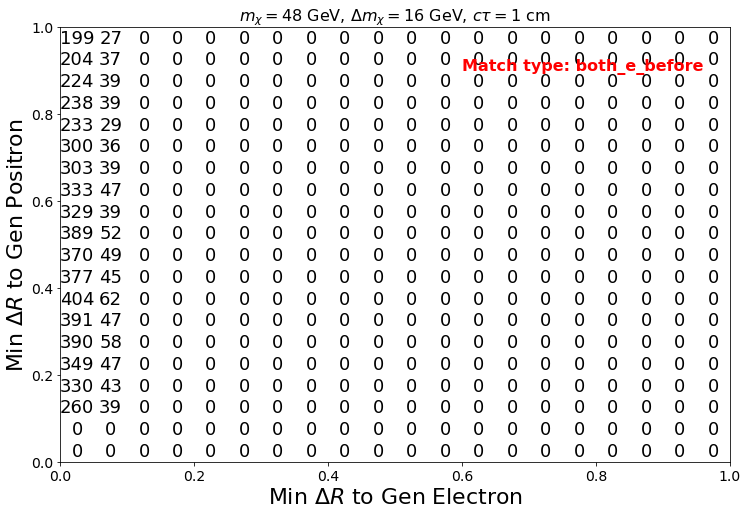

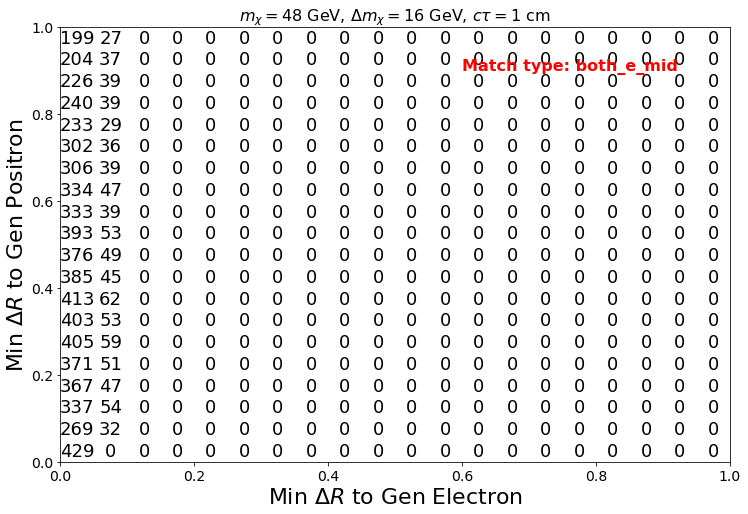

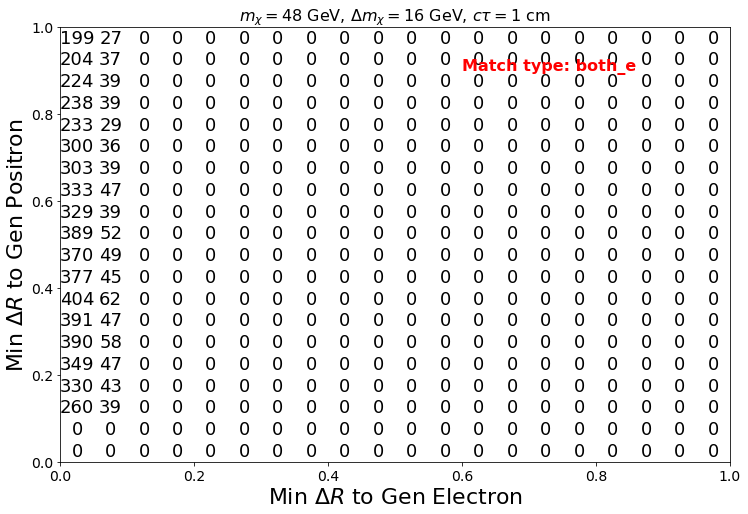

In [5]:
mtx = histos['conv2_mindR']
plt.figure(1,(12,8))
samp = samples[0]
info = sample_info[samples[0]]
match = "both_e_before"
mchi,dmchi,ctau = info["Mchi"],info["dMchi"],info["ctau"]
hist.plot2d(mtx.integrate("sample",samp).integrate("match",match),"dR_e",ax=plt.gca(),text_opts={"format":"%i","color":"black"})
plt.xlim([0,1])
plt.ylim([0,1])
plt.title(r"$m_\chi = {0:.0f}$ GeV, $\Delta m_\chi = {1:.0f}$ GeV, $c\tau = {2:.0f}$ mm".format(mchi,dmchi,ctau),fontsize=16) 
plt.text(0.6,0.9,"Match type: {0}".format(match),fontsize=16,color="red",weight="bold",transform=plt.gca().transAxes)
plt.show()

mtx = histos['conv2_mindR']
plt.figure(2,(12,8))
samp = samples[0]
info = sample_info[samples[0]]
match = "both_e_mid"
mchi,dmchi,ctau = info["Mchi"],info["dMchi"],info["ctau"]
hist.plot2d(mtx.integrate("sample",samp).integrate("match",match),"dR_e",ax=plt.gca(),text_opts={"format":"%i","color":"black"})
plt.xlim([0,1])
plt.ylim([0,1])
plt.title(r"$m_\chi = {0:.0f}$ GeV, $\Delta m_\chi = {1:.0f}$ GeV, $c\tau = {2:.0f}$ cm".format(mchi,dmchi,ctau),fontsize=16) 
plt.text(0.6,0.9,"Match type: {0}".format(match),fontsize=16,color="red",weight="bold",transform=plt.gca().transAxes)
plt.show()

mtx = histos['conv2_mindR']
plt.figure(3,(12,8))
samp = samples[0]
info = sample_info[samples[0]]
match = "both_e"
mchi,dmchi,ctau = info["Mchi"],info["dMchi"],info["ctau"]
hist.plot2d(mtx.integrate("sample",samp).integrate("match",match),"dR_e",ax=plt.gca(),text_opts={"format":"%i","color":"black"})
plt.xlim([0,1])
plt.ylim([0,1])
plt.title(r"$m_\chi = {0:.0f}$ GeV, $\Delta m_\chi = {1:.0f}$ GeV, $c\tau = {2:.0f}$ cm".format(mchi,dmchi,ctau),fontsize=16) 
plt.text(0.6,0.9,"Match type: {0}".format(match),fontsize=16,color="red",weight="bold",transform=plt.gca().transAxes)
plt.show()